# 예제 7-1 단순회귀분석 

### 기본 라이브러리 불러오기 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1 데이터 준비 

### csv 파일을 데이터프레임으로 전환 

In [3]:
df = pd.read_csv('./auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 열 이름 지정 

In [4]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

### 데이터 살펴보기 

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Step 2 데이터 탐색 

### 데이터 자료형 확인 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 24.9+ KB


### 데이터 요약 정보 확인 

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### horsepower 열의 자료형 변경(문자열 -> 숫자) 

In [8]:
df['horsepower'].unique() # 고유값 확인

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
df['horsepower'].replace('?', np.nan, inplace=True) #'?'을 np.nan으로 변경

In [32]:
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락 데이터 행 삭제

In [33]:
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

In [34]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Step 3 속성 (feature 또는 variable) 선택

### 분석에 활용할 열(속성) 선택 

In [35]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계 확인 

#### Matplotlib으로 산점도 그리기 

<AxesSubplot:xlabel='weight', ylabel='mpg'>

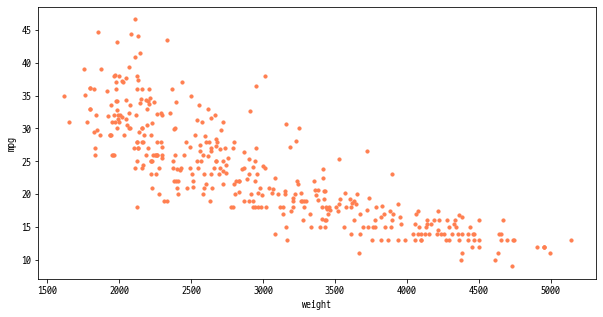

In [36]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))

#### seaborn으로 산점도 그리기 

<AxesSubplot:xlabel='weight', ylabel='mpg'>

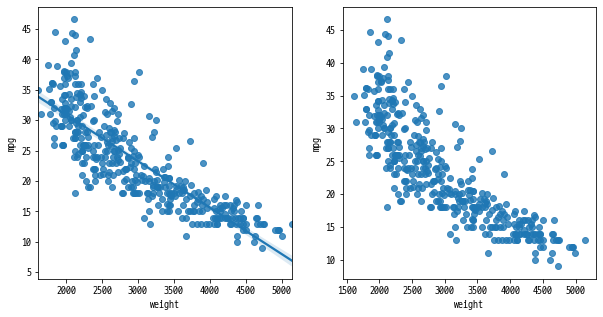

In [37]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) # 회귀선 미표시

#### seaborn 조인트 그래프 - 산점도, 히스토그램 

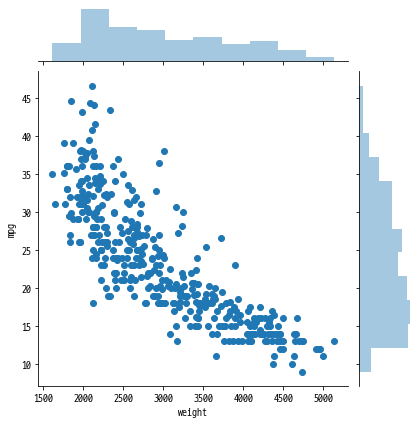

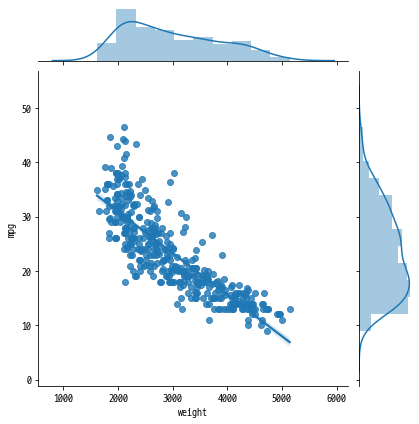

In [38]:
sns.jointplot(x='weight', y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시

#### seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기 

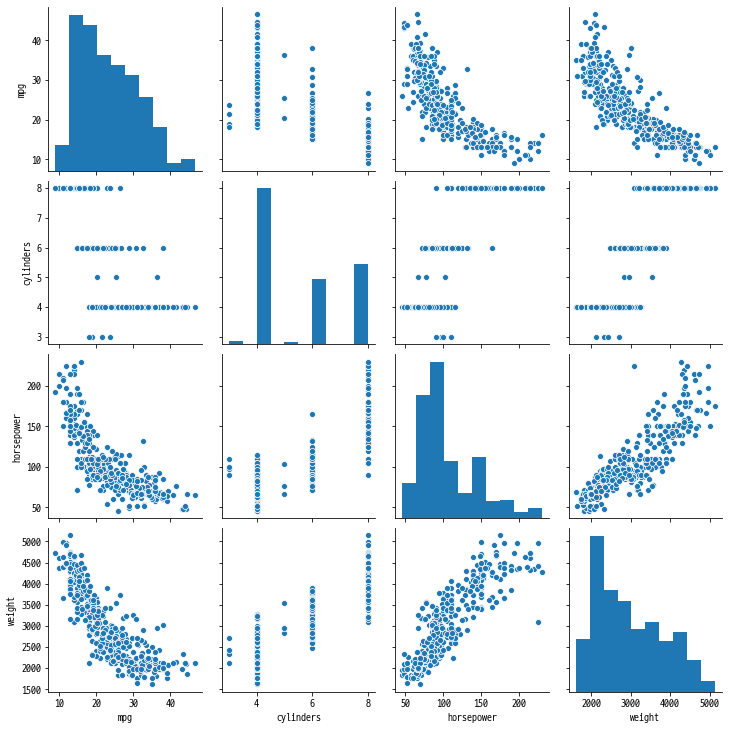

In [39]:
grid_ndf = sns.pairplot(ndf)

## Step 4 데이터셋 구분 - 훈련용/검증용 

### 속성(변수) 선택 

In [52]:
X = ndf[['weight']] # 독립 변수 X
Y = ndf[['mpg']] # 종속 변수 Y

### train data와 test data로 구분 (7:3 비율) 

In [53]:
 from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=10)

In [55]:
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


## Step 5 단순회귀분석 모형 만들기 - sklearn 

### sklearn 라이브러리에서 선형회귀분석 모듈 가져오기 

In [56]:
from sklearn.linear_model import LinearRegression

### 단순회귀분석 모형 객체 생성 

In [57]:
lr = LinearRegression()

### train data를 가지고 모형 학습 

In [58]:
lr.fit(X_train, Y_train)

LinearRegression()

### 학습을 마친 모형에 test data 적용하여 결정계수 계산

In [62]:
r_square = lr.score(X_test, Y_test)
r_square

0.6822458558299327

### 회귀식의 기울기 

In [65]:
print('기울기 a: ', lr.coef_)

기울기 a:  [[-0.00775343]]


### 회귀식의 y절편 

In [66]:
print('y 절편 b: ', lr.intercept_)

y 절편 b:  [46.71036626]


### 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 

In [67]:
y_hat = lr.predict(X)

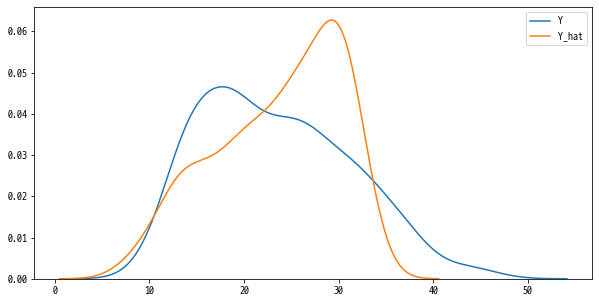

In [68]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label='Y')
ax2 = sns.distplot(y_hat, hist=False, label='Y_hat', ax=ax1)

출력된 결과를 보면 실제 값은 왼쪽으로 편향되어 있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보인다. 따라서 독립변수(weight)와 종속변수(mpg) 사이에 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보인다. 앞에서 그린 산점도를 보면 직선보다는 곡선의 형태가 더 적합해 보인다. 이럴 경우 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있다.

<AxesSubplot:xlabel='weight', ylabel='mpg'>

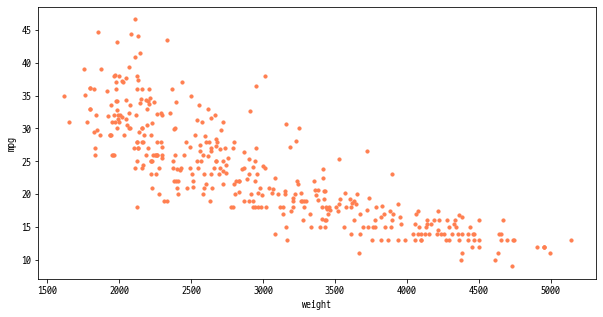

In [36]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))